<a href="https://colab.research.google.com/github/seansothey/CSC685/blob/master/Decision_tree_hyperparameter_tuning_HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://www.udmi.net/wp-content/uploads/2020/02/UDMI_Cardiovascular-Disease.png)
**Data Set Information:**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"


Attribute Information:

Only 14 attributes used:
1. age
2. sex
3. cp (chest pain) 
4. trestbps (resting blood pressure in mm Hg)
5. chol (cholesterol in mg/dl)
6. fbs (fasting blood sugar)
7. restecg (resting electrocardiographic results)
8. thalach (maximum heart rate achieved)
9. exang (exercise include angina)
10. oldpeak (ST depression induced by exercise relative to rest)
11. slope (the slope of peak exercise ST segment) 
12. ca (number of major vassels (0-3) colored by fluoroscopy)
13. thal (thalium heart scan)
14. hd (diagnosis of heart disease)

Ref.: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

#Setup

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline

#Data cleansing

Loading dataset from UCI machine learning database

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Assign each column/feature title based the given information

In [0]:
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']

In [5]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Dealing with missing data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
df.isna().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [8]:
missing_data=df.isin(['?']).sum()
missing_data

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         4
thal       2
hd         0
dtype: int64

In [0]:
#Custom function to calculate the precentage of an attribute
def cal_Percentage(attributeName,missing_data=missing_data,dataFrame=df):
    print('{0}: {1:.2f} % missing data'.format(attributeName,missing_data[attributeName]/len(df)*100))

In [10]:
for i in missing_data.keys():
  if missing_data[i] > 0:
    cal_Percentage(i)

ca: 1.32 % missing data
thal: 0.66 % missing data


Since the missing value is very small, let's delete those missing rows

In [0]:
df = df[df.ca != '?']
df = df[df.thal != '?']

In [12]:
df.isin(['?']).sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


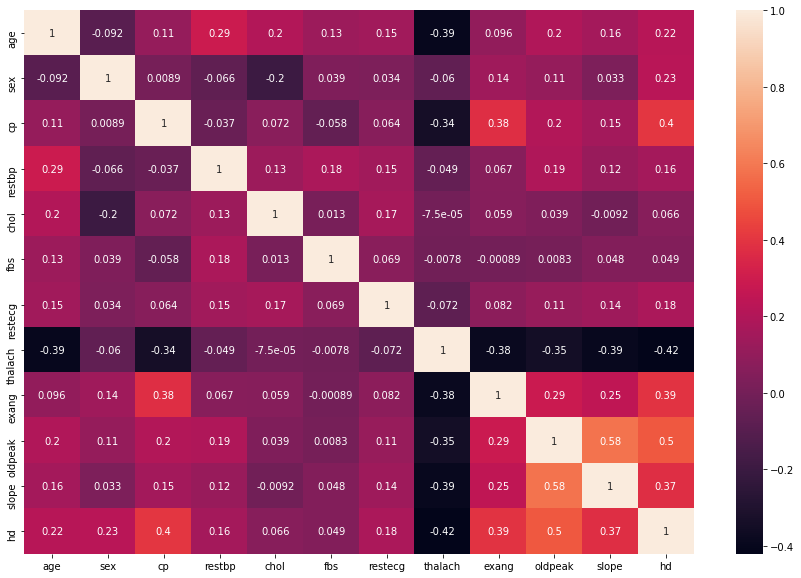

In [13]:
import seaborn as sns

corr = df.corr()

fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, annot = True)

This can be seen that there aren't any high correlation (value >0.8) between each feature; therefore, all features should be used.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81d2b23748>,
      dtype=object)

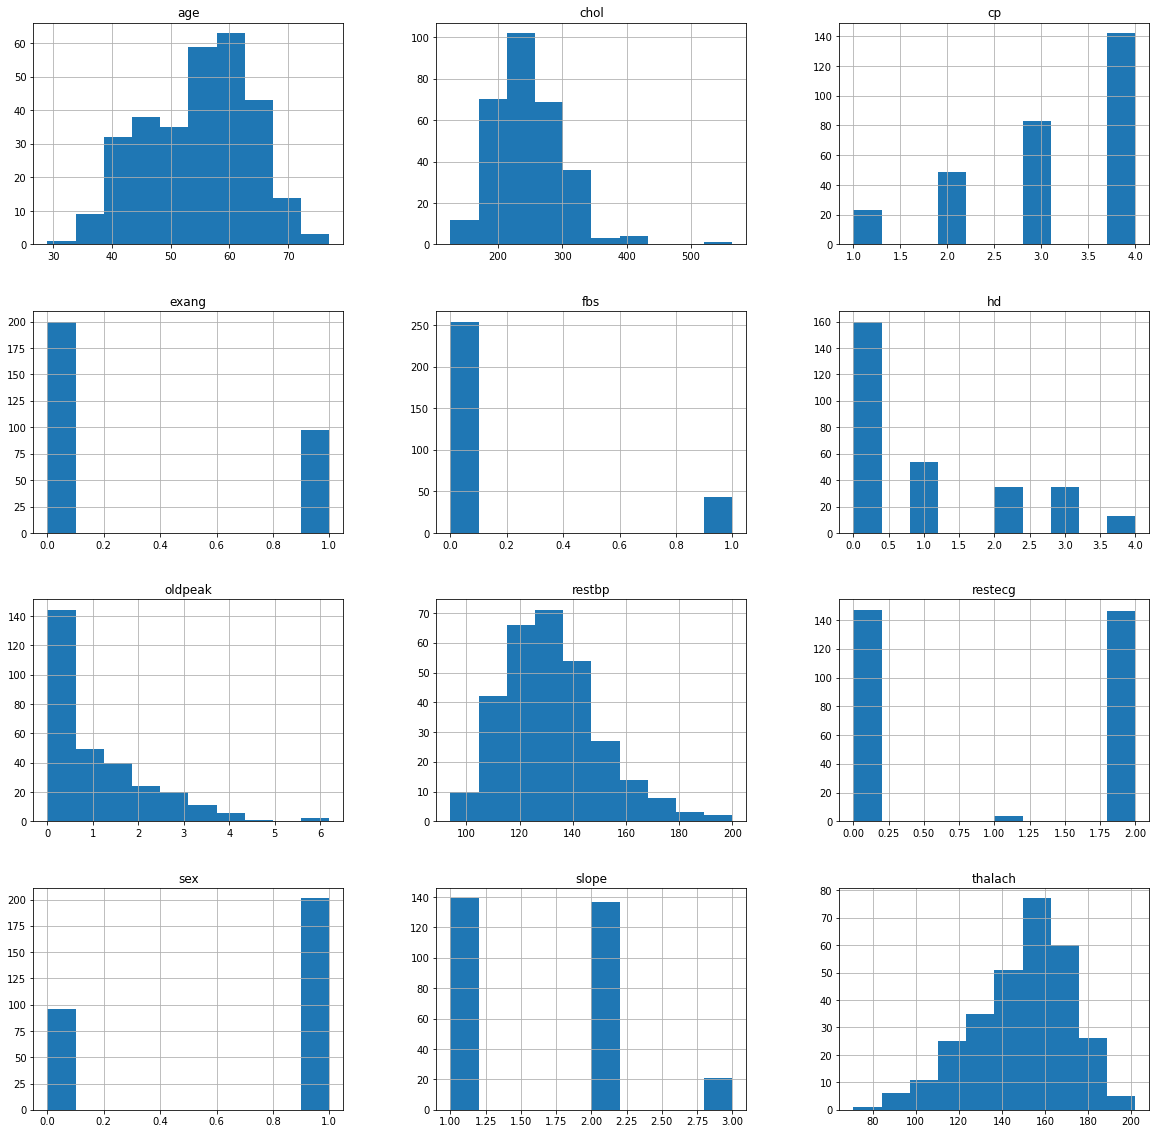

In [14]:
#See the data distribution
df.hist(figsize=(20,20))

##Create input data X and label y

In [0]:
X = df.drop('hd', axis=1)

Convert columns to category value

In [0]:
X = pd.get_dummies(X, columns=['cp','restecg', 'slope', 'thal']) #'sex', 'fbs' and 'exang' has only 0 and 1, so leave it as is

Scale the numercial value columns

In [0]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler(feature_range=[0, 1])
#X[['age','restbp','chol','thalach','oldpeak']] = scaler.fit_transform(X[['age','restbp','chol','thalach','oldpeak']])

In [18]:
X.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,0,0,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,0,0,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,1,0,0,0,0,1,1,0,0,1,0,0


In [19]:
y = df['hd']
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

Convert label y to 0 (no heart disease) and 1 (has heart disease)

In [0]:
y_positive = y > 0
y[y_positive] = 1

In [21]:
y.unique()

array([0, 1])

Split the data train-test set with ratio 80%-20%

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=42)

#Build a preliminary classification model

In [23]:
DT_clf = DecisionTreeClassifier(random_state=42)
DT_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Draw the preliminary decistion tree model

[Text(670.1812500000001, 518.8909090909091, 'ca <= 0.5\ngini = 0.499\nsamples = 237\nvalue = [124, 113]\nclass = No_HD'),
 Text(433.6125, 469.4727272727273, 'thal_7.0 <= 0.5\ngini = 0.384\nsamples = 139\nvalue = [103, 36]\nclass = No_HD'),
 Text(276.675, 420.05454545454546, 'oldpeak <= 2.7\ngini = 0.243\nsamples = 99\nvalue = [85, 14]\nclass = No_HD'),
 Text(181.35000000000002, 370.6363636363636, 'age <= 57.5\ngini = 0.192\nsamples = 93\nvalue = [83, 10]\nclass = No_HD'),
 Text(93.0, 321.21818181818185, 'chol <= 311.5\ngini = 0.062\nsamples = 62\nvalue = [60, 2]\nclass = No_HD'),
 Text(55.800000000000004, 271.8, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No_HD'),
 Text(37.2, 222.38181818181818, 'sex <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = No_HD'),
 Text(18.6, 172.96363636363634, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No_HD'),
 Text(55.800000000000004, 172.96363636363634, 'exang <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\ncla

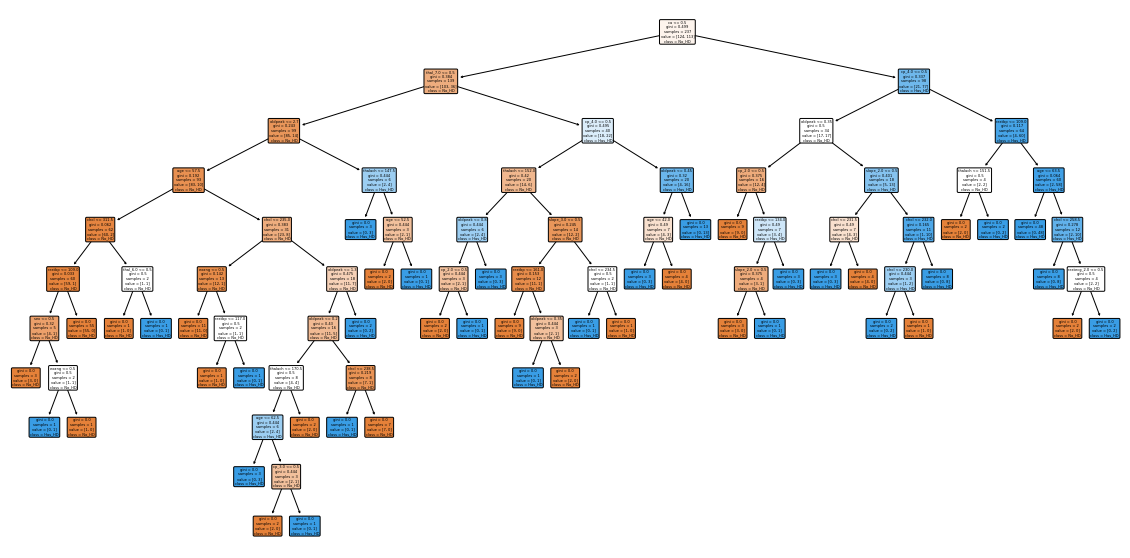

In [24]:
plt.figure(figsize=(20, 10))
plot_tree(DT_clf,
          filled=True,
          rounded=True,
          class_names=['No_HD', 'Has_HD'],
          feature_names=X.columns)

In [25]:
DT_clf.score(X_test, y_test)

0.8166666666666667

See the confusion matrix on test set

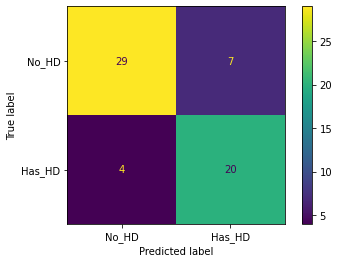

In [26]:
plot_confusion_matrix(DT_clf, X_test, y_test, display_labels=['No_HD', 'Has_HD'])

#Tuning the model with GridSearchCV

In [0]:
def DT_GridSearchCV(X,y):
    #create a dictionary of all values we want to test
    param_grid = {
                  'ccp_alpha' : np.arange(0, 0.2, 0.01),
                  'criterion':['gini','entropy'],
                  #'max_depth': np.arange(4, 40, 2),
                  'splitter' : ['best', 'random'],
                  'max_features' : ['None', 'auto', 'sqrt', 'log2'],
                  'min_weight_fraction_leaf' : np.arange(0, 1, 0.1),
                  'class_weight' : ['None', 'balanced'],
                  'random_state' : np.arange(0, 101, 10)
                  }
    #decision tree model
    model = DecisionTreeClassifier()
    #use gridsearch to test all values
    model_gs = GridSearchCV(model, param_grid, cv=5, verbose=0, n_jobs=-1)
    #fit model with data
    model_gs.fit(X, y)
    return model_gs.best_estimator_

In [0]:
best_model = DT_GridSearchCV(X_train, y_train)

In [75]:
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=30,
                       splitter='random')


Fit the best model param with the test set

In [76]:
best_model.score(X_test, y_test)

0.8833333333333333

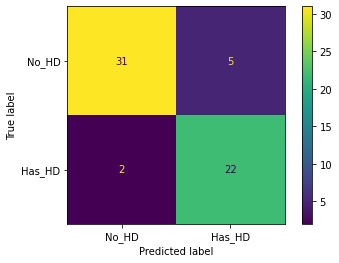

In [77]:
plot_confusion_matrix(best_model, X_test, y_test, display_labels=['No_HD', 'Has_HD'])

The correct prediction on "No Heart Disease" increased from 29 to 31, and for "Has Heart Disease" increased from 20 to 22.

##Horay !!! The socre has increased from 0.8167 to 0.8833 after tuning some parameters.